# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [88]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

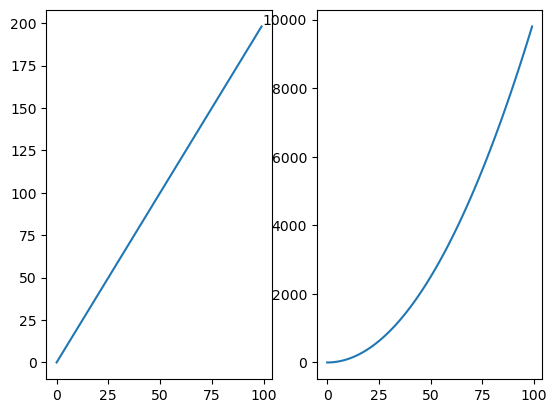

In [5]:
sns.plot(x)


#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

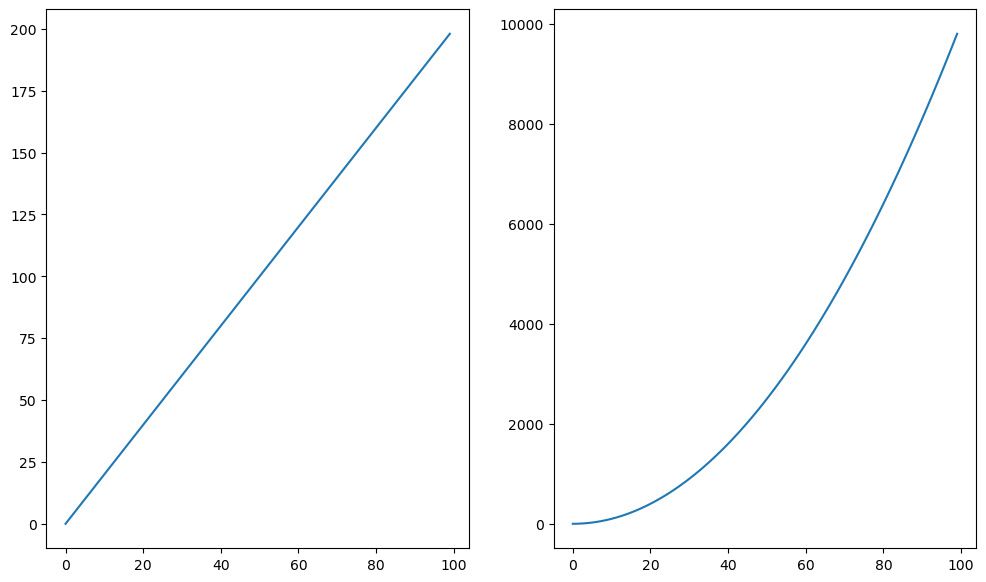

In [9]:
fig , ax = plt.subplots(ncols=2,nrows=1, figsize= (12,7))

ax[0].plot(x,y)
ax[1].plot(x,z)

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

Text(0.5, 0, 'x')

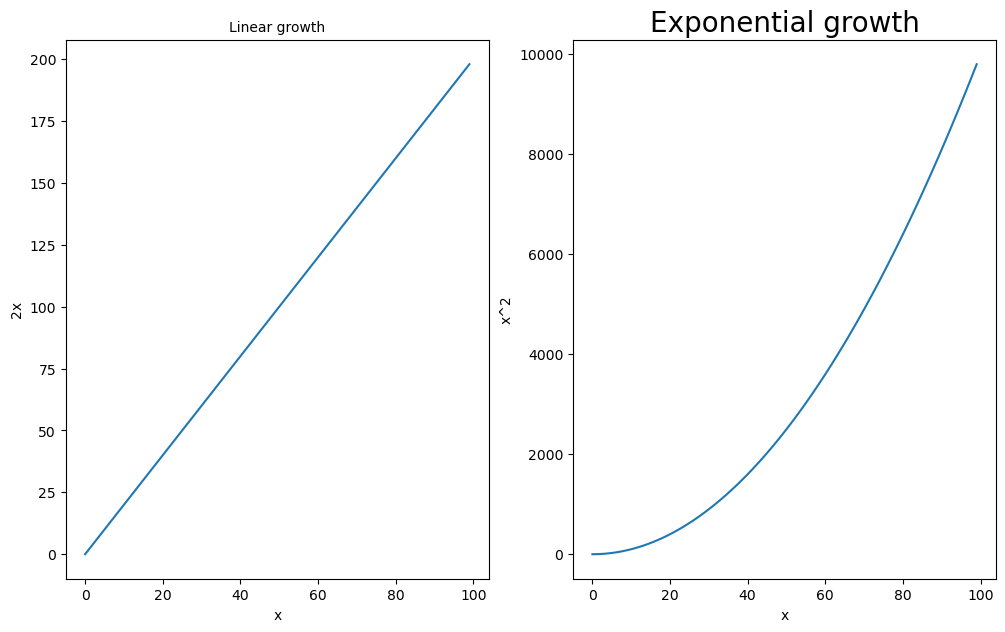

In [27]:
fig , ax = plt.subplots(ncols=2,nrows=1, figsize= (12,7))

ax[0].plot(x,y)
ax[1].plot(x,z)


ax[0].set_title('Linear growth')
ax[0].title.set_size(10)
ax[1].set_title('Exponential growth')
ax[1].title.set_size(20)
ax[0].set_ylabel('2x')
ax[0].set_xlabel('x')
ax[1].set_ylabel('x^2')
ax[1].set_xlabel('x')

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

In [24]:
x = np.arange(0,100)
z = x**2
j = np.exp(x)

#### As a bonus challenge, try to add a legend to the plot.

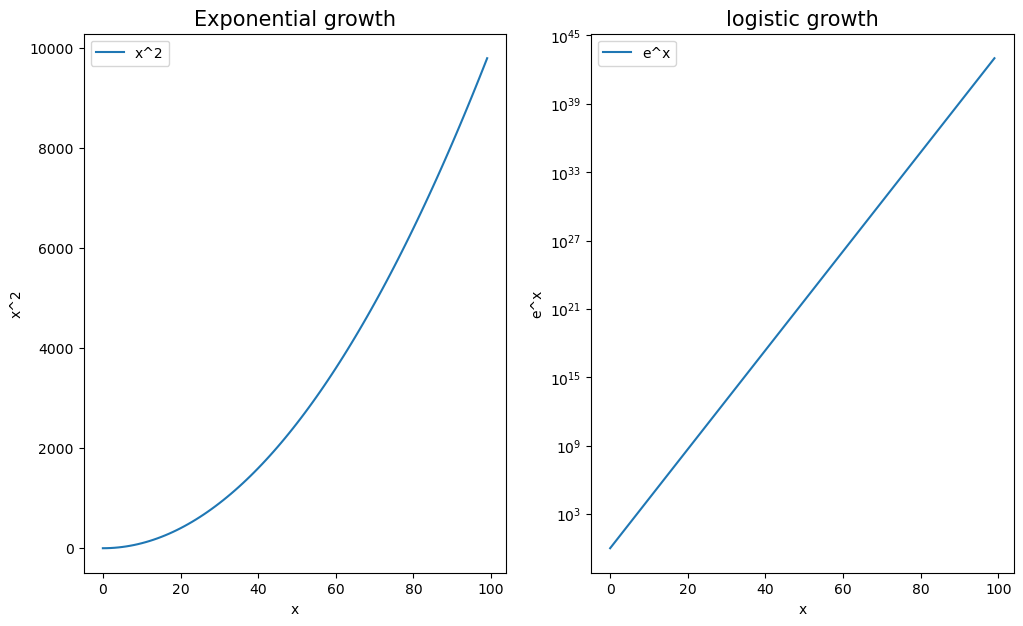

In [37]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12,7))

line0, = ax[0].plot(x,z)
line1, = ax[1].plot(x,j)
ax[1].set_yscale('log')

ax[0].set_title('Exponential growth')
ax[0].title.set_size(15)
ax[1].set_title('logistic growth')
ax[1].title.set_size(15)
ax[0].set_ylabel('x^2')
ax[0].set_xlabel('x')
ax[1].set_ylabel('e^x')
ax[1].set_xlabel('x')

line0.set_label('x^2')
line1.set_label('e^x')
ax[0].legend()
ax[1].legend()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [39]:
fitbit = pd.read_csv('../data/fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

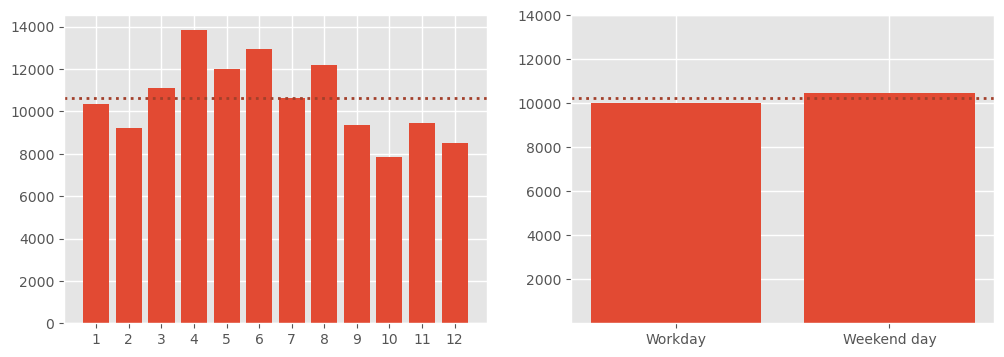

In [156]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# MEDIAN STEPS BY MONTH_ENCODED
# your code here
grp_by_mth = fitbit[['Steps','Months_encoded']].groupby('Months_encoded').median().reset_index()
ax[0].bar(grp_by_mth['Months_encoded'], grp_by_mth['Steps'])
ax[0].axhline(grp_by_mth['Steps'].mean(), ls=':',
           color='#a2402b')
ax[0].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])


# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
grp_by_day = fitbit[['Steps','Work_or_Weekend']].groupby('Work_or_Weekend').median().reset_index()
plt.sca(ax[0])
ax[1].bar(grp_by_day['Work_or_Weekend'], grp_by_day['Steps'])
ax[1].axhline(grp_by_day['Steps'].mean(), ls=':',
           color='#a2402b')
ax[1].set_xticks([0,1],labels=['Workday','Weekend day'])
ax[1].set_yticks([2000,4000,6000,8000,10000,12000,14000])
fig.savefig('../data/figures/fitbit.png')

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

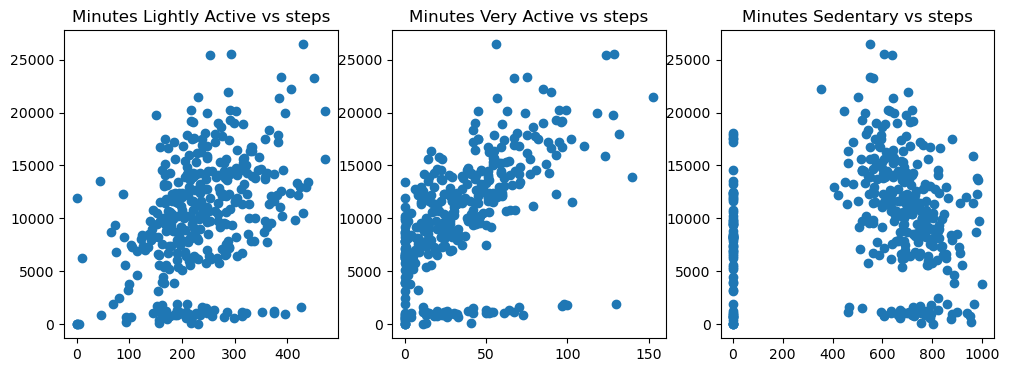

In [66]:
cols = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']
fig ,ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
for i in range(len(cols)):
    ax[i].scatter(fitbit[cols[i]], fitbit['Steps'])
    ax[i].set_title(f'{cols[i]} vs steps')

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [67]:
titanic = pd.read_csv('../data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [70]:
print(titanic.dtypes)
titanic.info()

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [72]:
# NUMERICAL VARIABLES
titanic.select_dtypes(['float64', 'int64'])
#despite being numerical variables survived, Pclass, Sibsp and Parch are categorical variables as they use numbers to refer to categories

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [73]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(['object'])
#only true categorical variables here are gender and embarked

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [83]:
print(plt.style.available)
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (12, 6)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


#### Use the right visulalization to show the distribution of column `Age`.

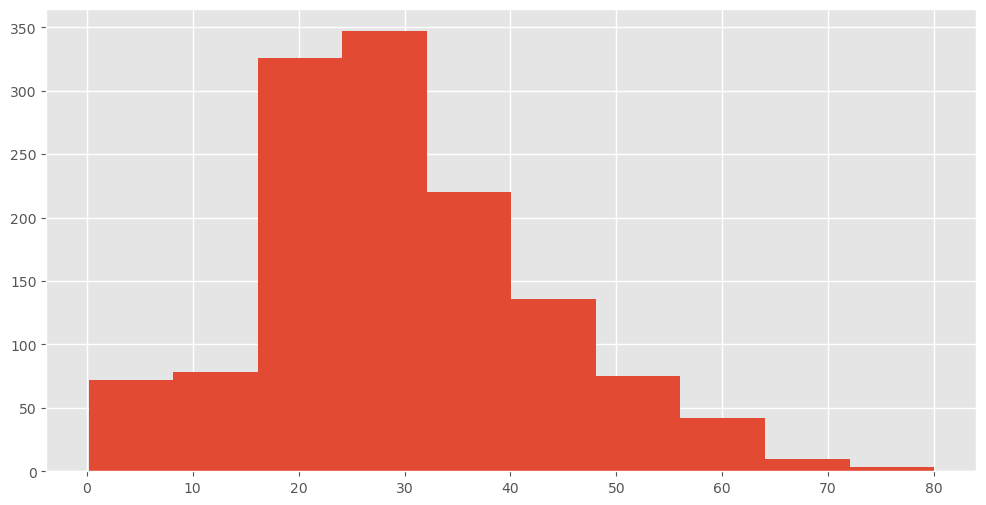

In [84]:
titanic['Age'].hist()
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

(array([ 22.,  19.,  10.,  11.,  10.,  13.,   8.,   8.,  23.,  26.,  20.,
         75.,  29.,  93., 109.,  43.,  72.,  68., 111.,  53.,  71.,  47.,
         35.,  24.,  43.,  26.,  29.,  15.,  35.,  31.,  15.,  26.,   7.,
         14.,  13.,   5.,   9.,   8.,  11.,   9.,   3.,   2.,   0.,   2.,
          3.,   0.,   1.,   1.,   0.,   1.]),
 array([ 0.17  ,  1.7666,  3.3632,  4.9598,  6.5564,  8.153 ,  9.7496,
        11.3462, 12.9428, 14.5394, 16.136 , 17.7326, 19.3292, 20.9258,
        22.5224, 24.119 , 25.7156, 27.3122, 28.9088, 30.5054, 32.102 ,
        33.6986, 35.2952, 36.8918, 38.4884, 40.085 , 41.6816, 43.2782,
        44.8748, 46.4714, 48.068 , 49.6646, 51.2612, 52.8578, 54.4544,
        56.051 , 57.6476, 59.2442, 60.8408, 62.4374, 64.034 , 65.6306,
        67.2272, 68.8238, 70.4204, 72.017 , 73.6136, 75.2102, 76.8068,
        78.4034, 80.    ]),
 <BarContainer object of 50 artists>)

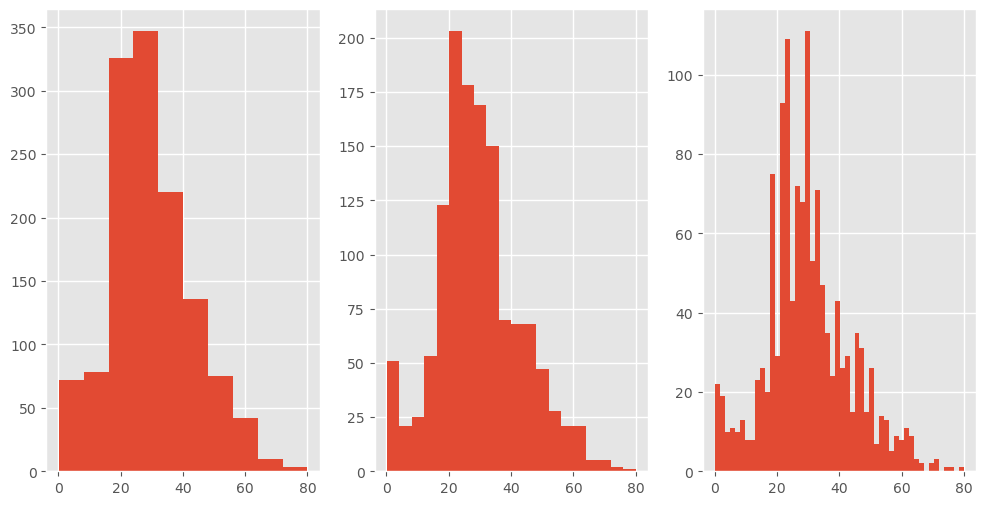

In [86]:
fig, ax = plt.subplots(nrows=1,ncols=3)
ax[0].hist(titanic['Age'], bins=10)
ax[1].hist(titanic['Age'], bins=20)
ax[2].hist(titanic['Age'], bins=50)


#### How does the bin size affect your plot?

In [ ]:
"""
It gives more or less resolution to the histogram. More detail can be spotted the more bins there are,
but maybe the general idea is harder to get. The Ideal in my opinion is in the middle 20 bins
"""

#### Use seaborn to show the distribution of column `Age`.

<Axes: xlabel='Age', ylabel='Count'>

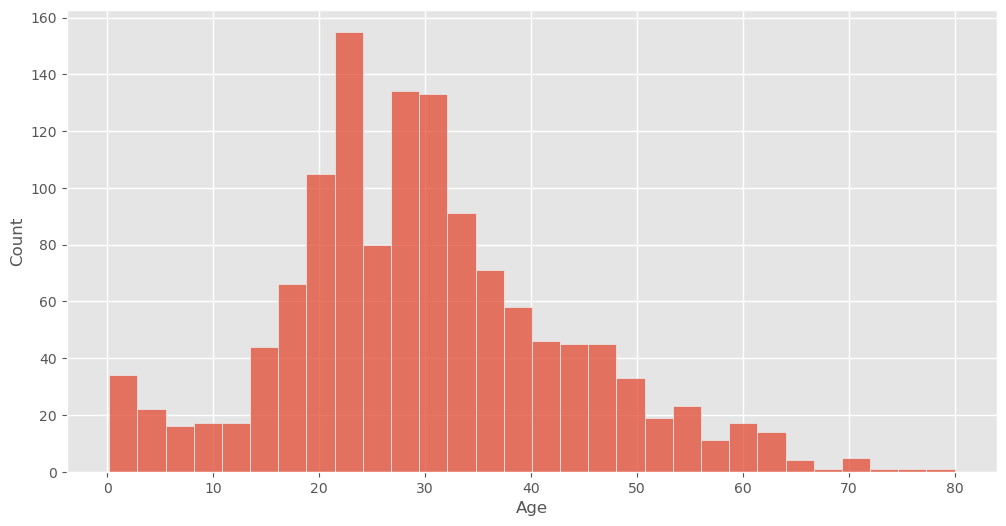

In [92]:
sns.histplot(titanic['Age'])

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [98]:
titanic['Gender'].describe()

count     1309
unique       2
top       male
freq       843
Name: Gender, dtype: object

<BarContainer object of 2 artists>

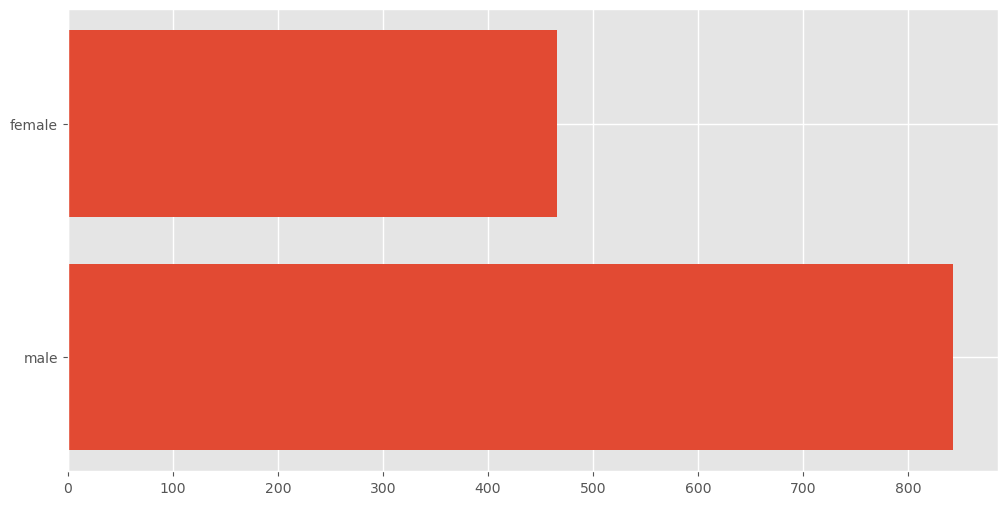

In [96]:
# Method 1 - matplotlib
fig, ax = plt.subplots()
gender_counts = titanic['Gender'].value_counts()
data = [gender_counts['male'], gender_counts['female']]
ax.barh(['male', 'female'], data)

In [102]:
titanic['Gender'].value_counts().values


array([843, 466], dtype=int64)

<Axes: xlabel='Gender', ylabel='count'>

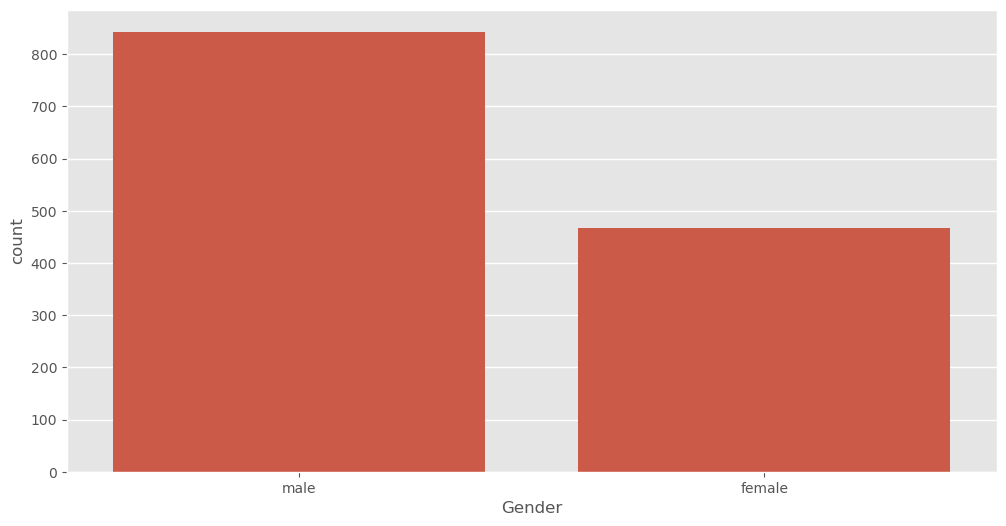

In [105]:
# Method 2 - seaborn
sns.barplot(titanic['Gender'].value_counts())

#### Use the right plot to visualize the column `Pclass`.

<Axes: xlabel='Pclass', ylabel='count'>

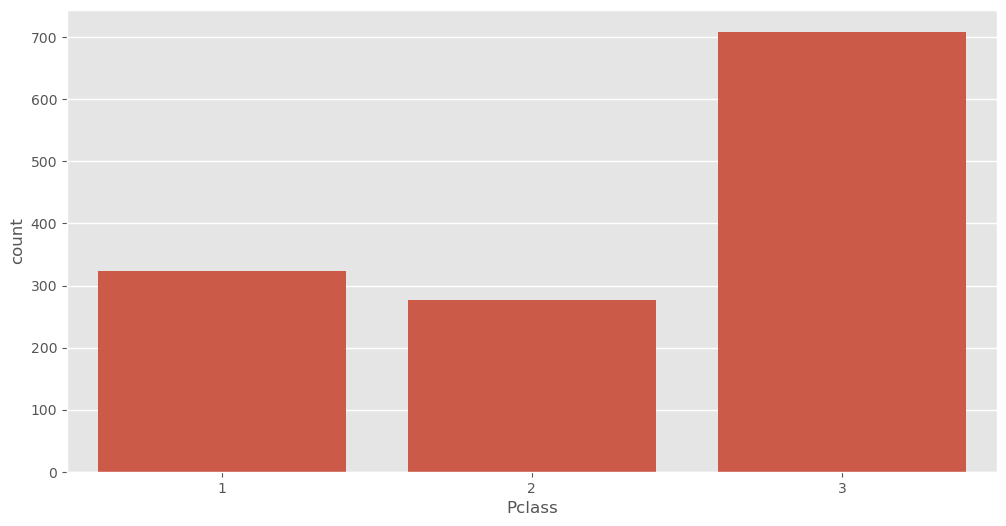

In [110]:
sns.barplot(titanic['Pclass'].value_counts())

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

<Axes: ylabel='Age'>

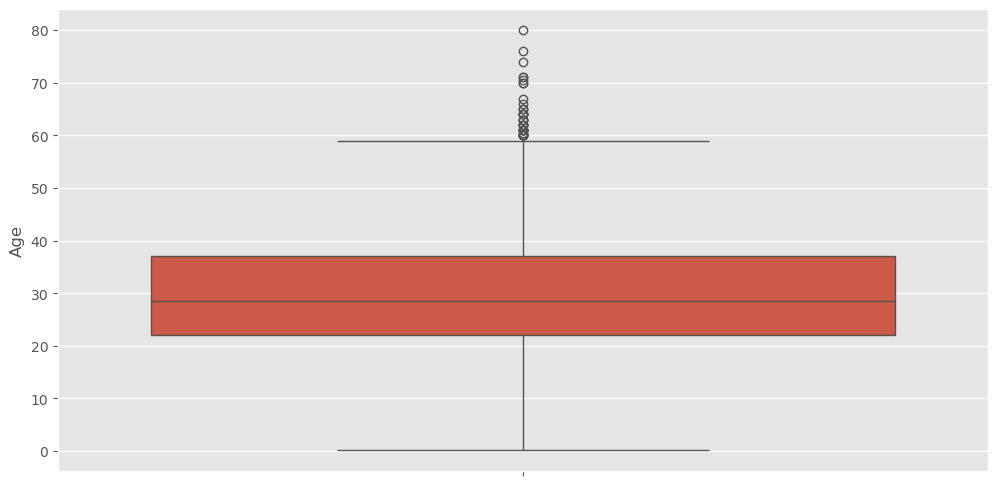

In [130]:
sns.boxplot(titanic['Age'])


In [ ]:
"""
I think it is hard to get all the summary statistics from a single representation. Anyway box plot gives us a lot of information about summary statistics
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
It tells me the minimun and maximun value, as well as the median, quartiles and 0.05 and 0.95 quantiles.
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

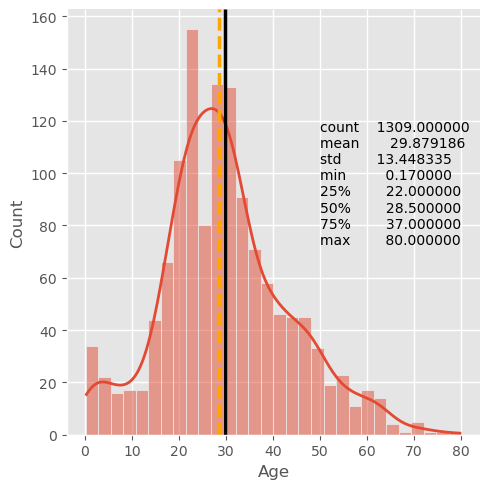

In [129]:
sns.displot(titanic['Age'],kde=True)
plt.figtext(0.65,0.5, titanic['Age'].describe().to_string())
plt.axvline(titanic['Age'].mean(), c='k', ls='-', lw=2.5)
plt.axvline(titanic['Age'].median(), c='orange', ls='--', lw=2.5)

C:\Users\rjcol\AppData\Local\Temp\ipykernel_10756\2925791388.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.violinplot(x='Age', data=titanic, color='skyblue', inner='quartile', hue='Gender',split = True)


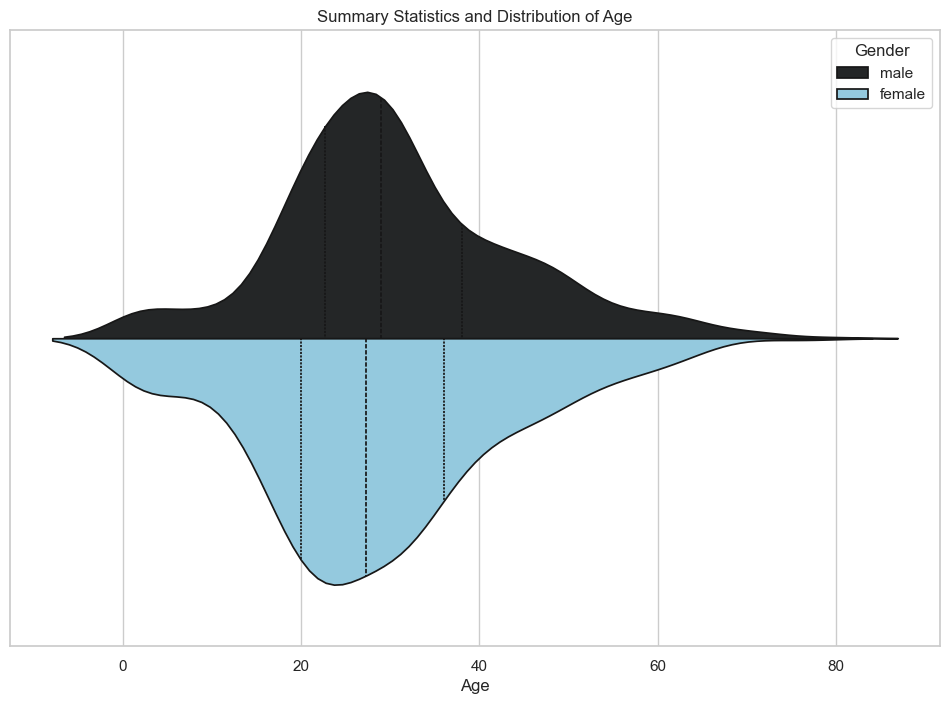

In [160]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.violinplot(x='Age', data=titanic, color='skyblue', inner='quartile', hue='Gender',split = True)

plt.title('Summary Statistics and Distribution of Age')
plt.xlabel('Age')

plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
Most and less frequent values by range.
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

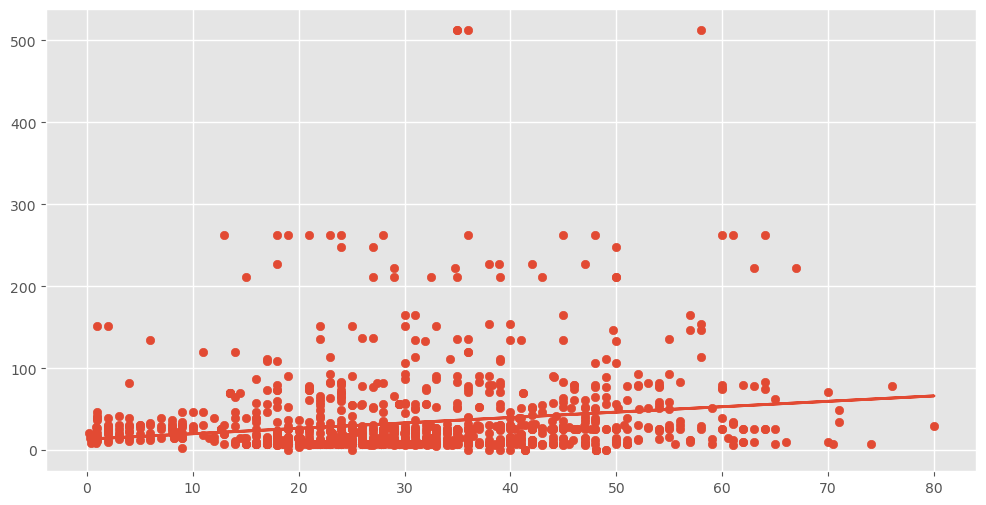

In [134]:
# Method 1 - matplotlib
fig, ax = plt.subplots()
ax.scatter(titanic['Age'],titanic['Fare'])
m, b = np.polyfit(titanic['Age'], titanic['Fare'], 1) 
plt.plot(titanic['Age'], m*titanic['Age']+b)

<Axes: xlabel='Age', ylabel='Fare'>

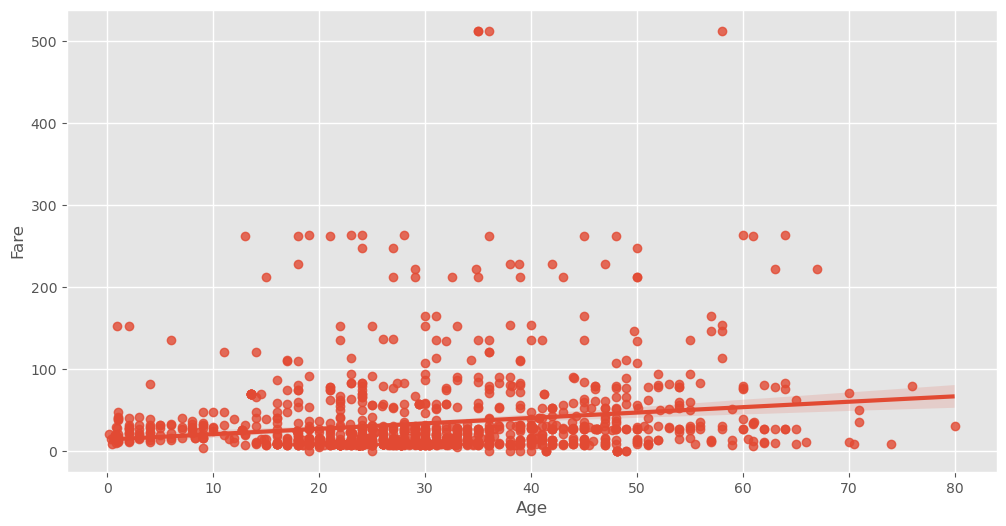

In [137]:
# Method 2 - seaborn
sns.regplot(x='Age',y='Fare',data=titanic)

#### Plot the correlation matrix using seaborn.

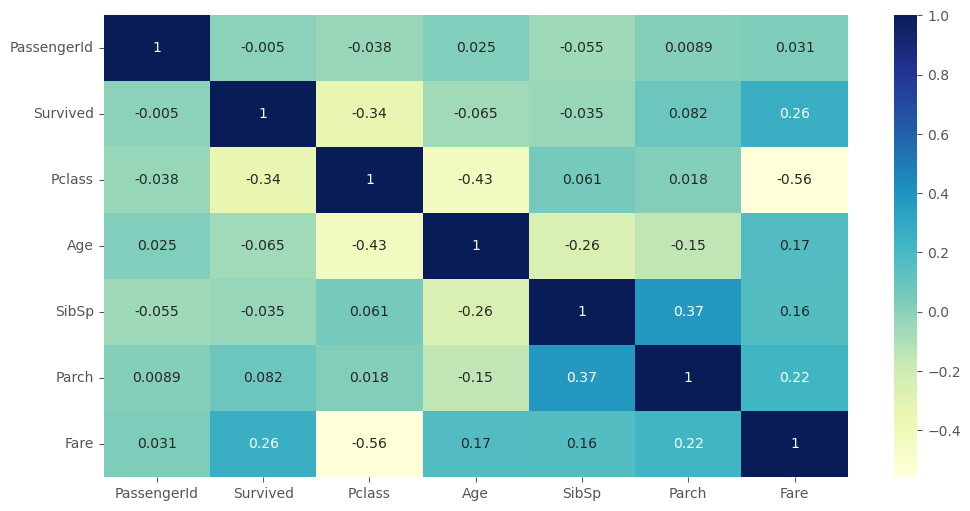

In [141]:
dataplot = sns.heatmap(titanic.select_dtypes(['float64', 'int64']).corr(), cmap="YlGnBu", annot=True) 

#### What are the most correlated features?

In [ ]:
"""
Although negative, passenger and fare show the strongest correlation wich make sense as the first(1) class is the most expensive and the thrid(3) class the cheapest.
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

<Axes: xlabel='Pclass', ylabel='Age'>

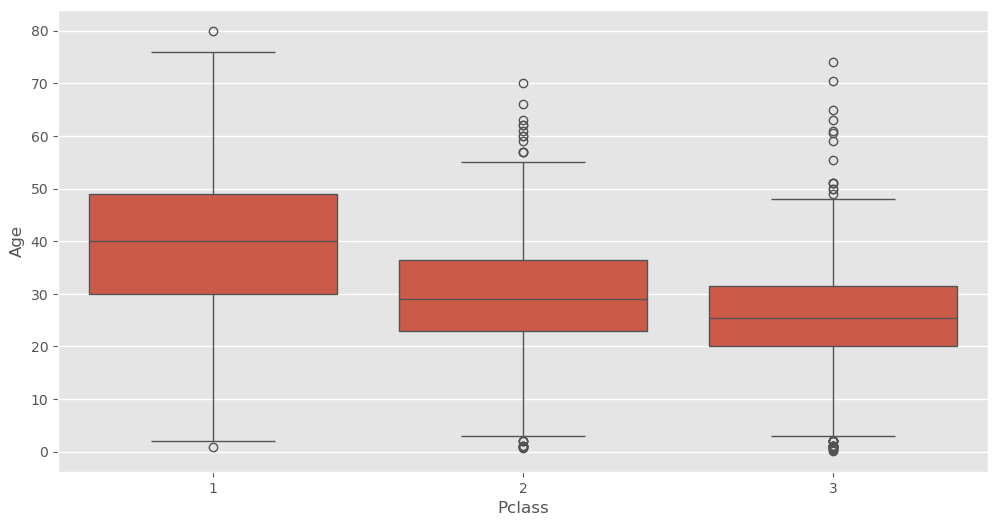

In [142]:
sns.boxplot(x='Pclass', y='Age', data=titanic)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

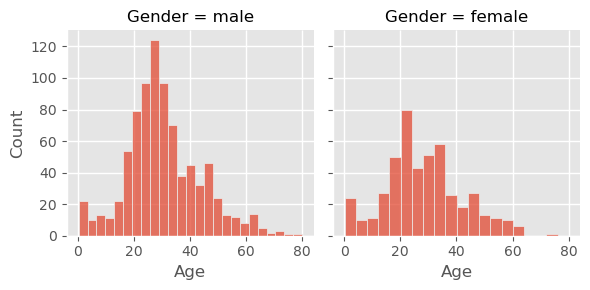

In [151]:
graph = sns.FacetGrid(titanic, col='Gender')
graph.map(sns.histplot, 'Age')